In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader

loader = TextLoader('test.txt')
documents = loader.load()

# 初始化文本分割器
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", "。", "？","！"],
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len
    )
split_docs = text_splitter.split_documents(documents)

chunks = [doc.page_content for doc in split_docs]

print(len(chunks))


9


[950, 895, 921, 272, 976, 439, 906, 838, 215]


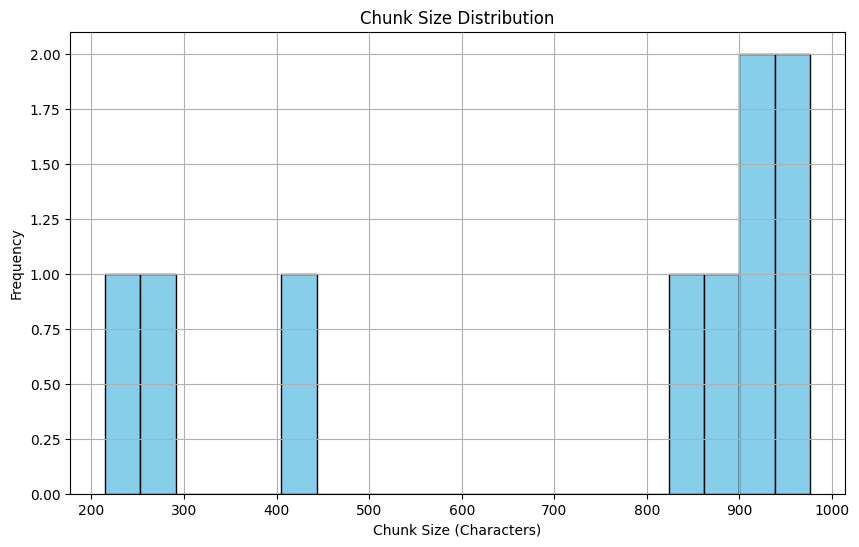

In [9]:
import matplotlib.pyplot as plt

# 计算每个块的大小
chunk_sizes = [len(chunk) for chunk in chunks]
print(chunk_sizes)
# 绘制块大小分布图
plt.figure(figsize=(10, 6))
plt.hist(chunk_sizes, bins=20, color='skyblue', edgecolor='black')
plt.title('Chunk Size Distribution')
plt.xlabel('Chunk Size (Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


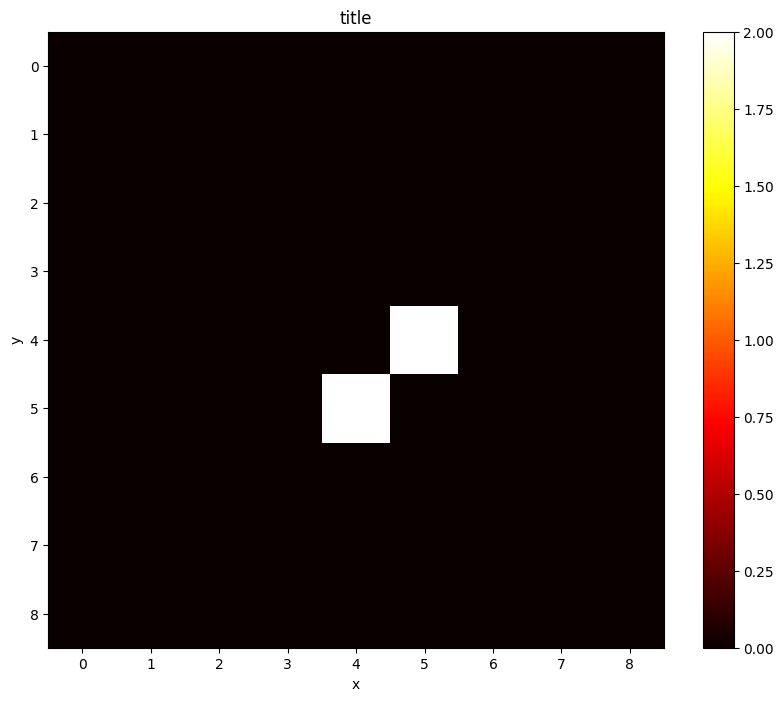

In [13]:
import numpy as np
# 计算分块重叠度
overlap_matrix = np.zeros((len(chunks), len(chunks)))
for i in range(len(chunks)):
    for j in range(i + 1, len(chunks)):
        overlap = len(set(chunks[i].split()) & set(chunks[j].split()))
        overlap_matrix[i, j] = overlap
        overlap_matrix[j, i] = overlap
print(overlap_matrix)
# 绘制分块重叠度热力图
plt.figure(figsize=(10, 8))
plt.imshow(overlap_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('title') # 分块重叠度热力图
plt.xlabel('x')
plt.ylabel('y')
plt.show()